In [11]:
!pip install Finance-DataReader

import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# CSV 파일 경로
file_path = r"C:\Gachon\3-1\인공지능개론\AAME.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# Open 열만 추출
open_prices = df['Open'].values.reshape(-1, 1)

# 결과 출력
print(open_prices)

[[0.       ]
 [0.       ]
 [0.       ]
 ...
 [2.25     ]
 [2.1099999]
 [2.1099999]]


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(open_prices)

TEST_SIZE =200
train_data = scaled[:-TEST_SIZE]
test_data =scaled[-TEST_SIZE:]



In [17]:
def make_sample(data,window):
    train=[]
    target=[]
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train),np.array(target)

X_train, y_train = make_sample(train_data,30)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1],1),
               activation='tanh',
               return_sequences=False)
           )
model.add(Dense(1))

C:\Users\cha08\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0038
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0026
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0029
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0026
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0025
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0023
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0022
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0027
Epoch 9/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0025
Epoch 10/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0020
Epoch 11/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0028
Epoch 12/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0024
Epoch 13/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0025
Epoch 14/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0021
Epoch 15/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 6

In [27]:
X_test, y_test= make_sample(test_data,30)
pred=model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


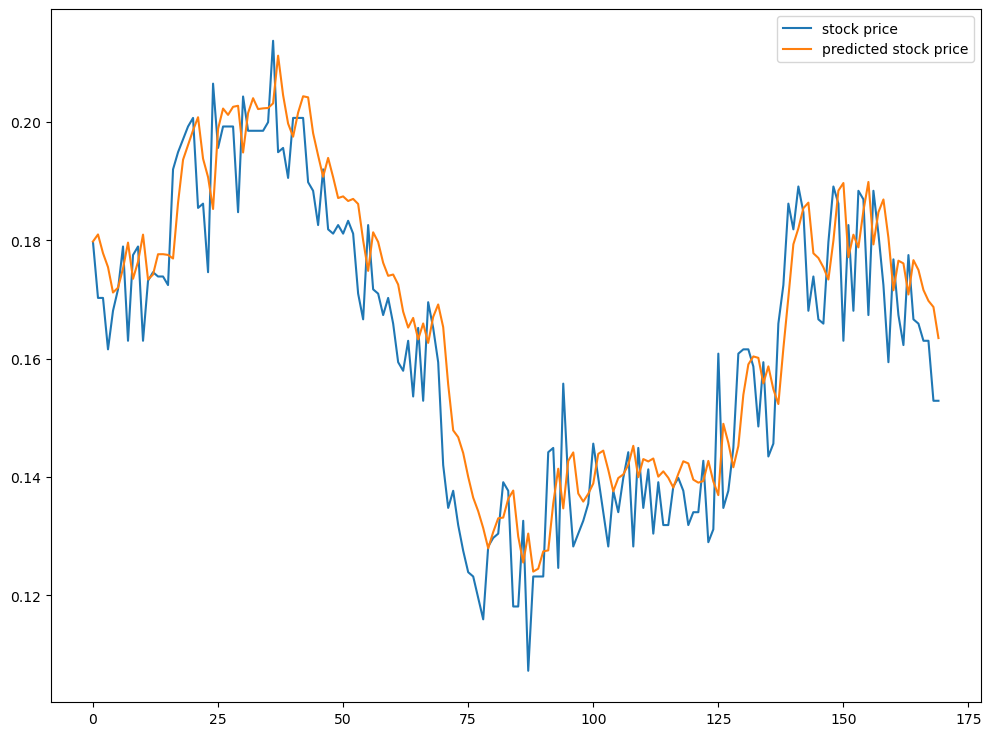

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()